## HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [3]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [5]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

**Type in your code here**

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [7]:
crash = crash.dropna(how='any',axis=0)
crash.isnull().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

**Type in your code here**

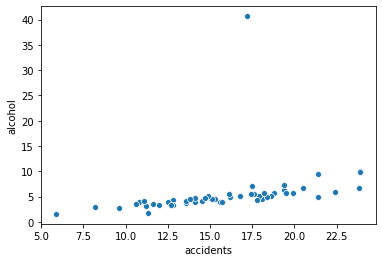

In [8]:
sns.scatterplot(x='accidents', y='alcohol', data=crash)

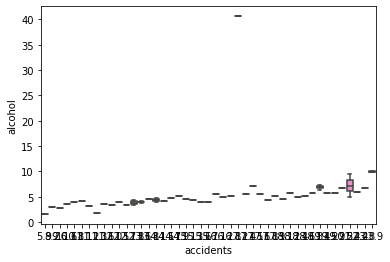

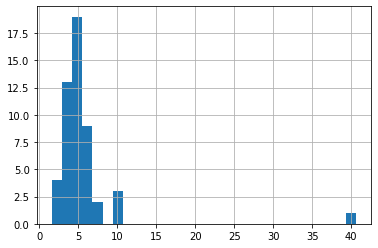

In [9]:
sns.boxplot(x='accidents', y='alcohol', data=crash)
plt.show()
var = 'alcohol'
oldval = crash[var]
oldval.describe()
oldval.hist(bins=30)

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

**Type in your code here**

In [10]:
print(crash.describe())
crash = crash[crash['alcohol'] <= 40]
crash.shape

       accidents   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.886275   5.060235   5.613745       13.703529    14.125980   
std     4.096048   2.033018   5.290060        4.523981     3.727166   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.800000   3.766500   3.912500       10.478000    11.541000   
50%    15.700000   4.806000   4.704000       13.959000    14.508000   
75%    18.500000   6.531000   5.641000       16.379000    16.755000   
max    23.900000   9.450000  40.642000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    880.520000  134.568627  
std     171.293504   24.889823  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%     998.680000  152.410000  
max    1301.520000  194.780000  


(50, 10)

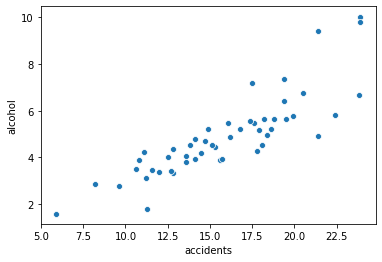

In [11]:
#new plot with outlier gone
sns.scatterplot(x='accidents', y='alcohol', data=crash)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Type in your code here**

In [12]:
sql = "select avg(speeding) from crash where region='Northeast'"
print(ps.sqldf(sql))

   avg(speeding)
0        4.42475


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [13]:
sql = "select region, count(*), avg(alcohol) from crash group by region"
print(ps.sqldf(sql))

      region  count(*)  avg(alcohol)
0    Midwest        12      4.996917
1  Northeast         8      3.980500
2      South        17      5.414647
3       West        13      4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

**Type in your code here**

In [14]:
sql = "select count(*), avg(speeding), min(speeding), max(speeding) from crash"
print(ps.sqldf(sql))

   count(*)  avg(speeding)  min(speeding)  max(speeding)
0        50        5.01944          1.792           9.45


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [15]:
#print(("count = {count}").format(count = {crash['speeding'].count()}))
count = crash['speeding'].count()
mean = crash['speeding'].mean()
minimum = crash['speeding'].min()
maximum = crash['speeding'].max()
print(f'count = {count}')
print(f'mean = {mean}')
print(f'min = {minimum}')
print(f'max = {maximum}')

count = 50
mean = 5.01944
min = 1.7919999999999998
max = 9.45


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

**Type in your code here**

In [16]:
crash[['accidents','speeding','alcohol','region']].groupby(['region']).skew()

,accidents,speeding,alcohol
region,,,
Midwest,0.950845,0.121197,2.093467
Northeast,0.777587,1.051666,0.764250
South,-1.125839,0.172035,0.330988
West,0.064819,0.697441,1.159752


In [17]:
crash[['accidents','speeding','alcohol','region']].groupby(['region']).std()

,accidents,speeding,alcohol
region,,,
Midwest,3.588988,1.537451,1.824432
Northeast,3.077453,2.327773,0.872950
South,4.537037,2.220711,1.773576
West,3.325118,1.803138,1.910356


In [18]:
crash[['accidents','speeding','alcohol','region']].groupby(['region']).apply(pd.DataFrame.kurtosis)

,accidents,speeding,alcohol
region,,,
Midwest,2.067092,-0.737061,5.597372
Northeast,0.726713,1.763520,0.890501
South,1.860064,-1.327699,2.125568
West,-1.048692,-0.465455,2.219220


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

**Type in your answer here**

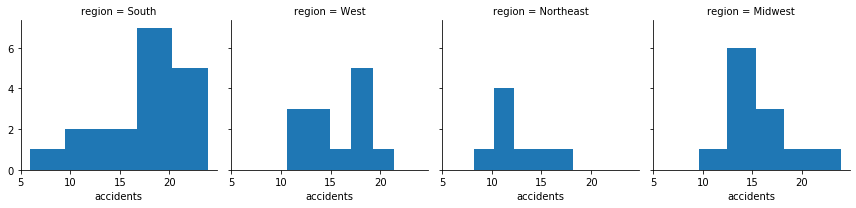

In [19]:
g = sns.FacetGrid(crash, col='region')
g = g.map(plt.hist, 'accidents', bins=5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

### Midwest has positive skew, while south has the negative skew.

**Type in your answer here**

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

**Type in your code here**

In [20]:
corr = crash.corr()
print(corr)


                accidents  speeding   alcohol  not_distracted  no_previous  \
accidents        1.000000  0.608632  0.850706        0.826209     0.956009   
speeding         0.608632  1.000000  0.667377        0.585337     0.568831   
alcohol          0.850706  0.667377  1.000000        0.730435     0.780696   
not_distracted   0.826209  0.585337  0.730435        1.000000     0.745712   
no_previous      0.956009  0.568831  0.780696        0.745712     1.000000   
ins_premium     -0.174157 -0.059254 -0.146921       -0.157416    -0.119067   
ins_losses      -0.025507 -0.059624 -0.103849       -0.068733     0.007872   

                ins_premium  ins_losses  
accidents         -0.174157   -0.025507  
speeding          -0.059254   -0.059624  
alcohol           -0.146921   -0.103849  
not_distracted    -0.157416   -0.068733  
no_previous       -0.119067    0.007872  
ins_premium        1.000000    0.625381  
ins_losses         0.625381    1.000000  


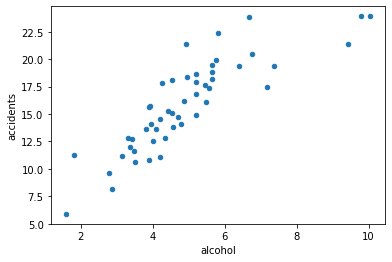

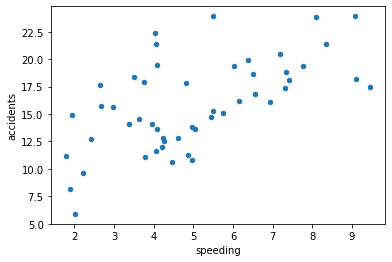

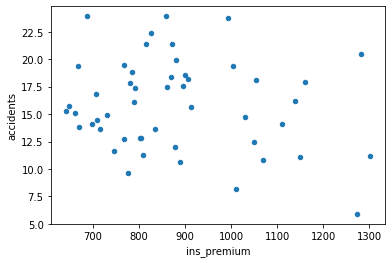

In [30]:
crash.plot.scatter(x='alcohol', y='accidents')
plt.show()
crash.plot.scatter(x='speeding', y='accidents')
plt.show()
crash.plot.scatter(x='ins_premium', y='accidents')
plt.show()

### Alcohol is the most contributing factor to accidents as demonstrated in the corr matrix

### Now Load a different dataset (MPG dataset number 3)

In [21]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [22]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [23]:
print(mpg['mpg'].mean())


23.64554455445545


In [24]:
newvalue = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['mpg'] = newvalue

In [25]:
newvalue = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['horsepower'] = newvalue

In [26]:
newvalue = mpg['weight'].fillna(mpg['weight'].mean())
mpg['weight'] = newvalue

In [27]:
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool